In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from sklearn.metrics import accuracy_score, classification_report

In [15]:
import sys
sys.path.append('/Users/antonialutz/code/ThorstenCodes/MorphoMind/')
from data_handling.params import LOCAL_DATA_PATH
platenr = '24277' #change Plate Number here
csv_file_path = os.path.join(LOCAL_DATA_PATH, f'{platenr}/raw/mean_well_profiles.csv')

In [16]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Preprocess the data: let's assume all columns except the first one (usually an ID or label column) are features
features = df.columns[1:]
X = df[features]


In [7]:
# Assuming the first column contains non-numeric data
numeric_data = df.select_dtypes(include=[np.number])

# Perform imputation on numeric data only
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Standardize the numeric data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

/Users/antonialutz/.pyenv/versions/3.10.6/envs/MorphoMind/lib/python3.10/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Metadata_pert_id_vendor']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [8]:
n_clusters = 4  # This is an example, adjust based on your needs

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data_scaled)
#df['Cluster'] = kmeans.fit_predict(numeric_data_scaled)

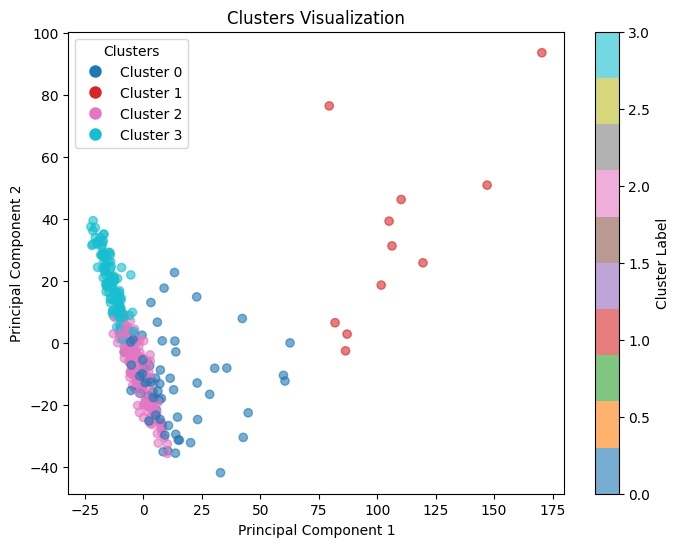

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming numeric_data_scaled is defined and scaled appropriately
# Example: numeric_data_scaled = np.random.rand(100, 10) # Dummy data for illustration

# Reduce the data to two principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data_scaled)

n_clusters = 4 # Adjust based on your needs

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='tab10', marker='o', alpha=0.6)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a colorbar
plt.colorbar(scatter, label='Cluster Label')

# Create a legend
legend_labels = {i: f'Cluster {i}' for i in range(n_clusters)}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                             markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(n_clusters)]
plt.legend(handles=legend_handles, title="Clusters")

plt.show()


## Testing the Model

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
df = pd.read_csv('/Users/antonialutz/.morpho_minds_data/24277/processed/24277_wells_labeled.csv')

# Filter out untreated wells
df_filtered = df[df['Metadata_ASSAY_WELL_ROLE'] != 'mock']

In [18]:
df_filtered.head()

,Metadata_Plate,Metadata_Well,Metadata_Assay_Plate_Barcode,Metadata_Plate_Map_Name,Metadata_well_position,Metadata_ASSAY_WELL_ROLE,Metadata_broad_sample,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,Labels
0,24277,a01,24277,H-BIOA-004-3,a01,treated,BRD-K18250272-003-03-7,3.022516,DMSO,BRD-K18250272,...,1.631313,1.937284,1.812554,1.386521,1.689170,1.547606,2.469984,2.376336,2.402145,0
1,24277,a02,24277,H-BIOA-004-3,a02,treated,BRD-K18316707-001-01-9,5.000000,DMSO,BRD-K18316707,...,1.696021,1.947088,1.897656,1.630578,1.773510,1.740362,2.552390,2.428562,2.458853,2
2,24277,a03,24277,H-BIOA-004-3,a03,treated,BRD-K18438502-001-02-6,5.000000,DMSO,BRD-K18438502,...,1.888156,2.060230,2.003572,1.730377,1.856694,1.799151,2.506932,2.431198,2.479527,2
3,24277,a04,24277,H-BIOA-004-3,a04,treated,BRD-K18550767-001-02-8,5.000000,DMSO,BRD-K18550767,...,1.854028,2.043121,1.994476,1.752150,1.788835,1.788962,2.665640,2.529105,2.598130,0
4,24277,a05,24277,H-BIOA-004-3,a05,treated,BRD-K18574842-323-03-3,2.195487,DMSO,BRD-K18574842,...,1.914947,2.237998,2.135490,1.697586,1.899021,1.844055,2.753912,2.590156,2.649836,0


In [19]:
unique_values = df_filtered['Labels'].unique()
unique_values

array([0, 2, 1, 3])

In [22]:
# Prepare features and labels
# Creating a new DataFrame for features to avoid SettingWithCopyWarning
features = df_filtered[['Metadata_broad_sample', 'Metadata_mmoles_per_liter', 'Metadata_solvent'] + [col for col in df.columns if 'Nuclei_Texture_Variance' in col]].copy()
label = df_filtered['Labels'].apply(lambda x: 0 if x in [0, 1] else 1)


In [23]:
# Encode categorical features using .loc to safely assign values
le = LabelEncoder()
features.loc[:, 'Metadata_broad_sample'] = le.fit_transform(features['Metadata_broad_sample'])
features.loc[:, 'Metadata_solvent'] = le.fit_transform(features['Metadata_solvent'])


In [24]:
# Normalize/Standardize numerical features if necessary
scaler = StandardScaler()
numerical_cols = ['Metadata_mmoles_per_liter'] + [col for col in features.columns if 'Nuclei_Texture_Variance' in col]
features.loc[:, numerical_cols] = scaler.fit_transform(features[numerical_cols])


In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)


In [26]:
# Initialize and train the classifier
#model = RandomForestClassifier(random_state=42)
#model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
# Predictions and evaluation
#predictions = model.predict(X_test)
#accuracy = accuracy_score(y_test, predictions)
#print(f'Model Accuracy: {accuracy}')
#print(classification_report(y_test, predictions))

Model Accuracy: 0.90625
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.90      0.98      0.94        47

    accuracy                           0.91        64
   macro avg       0.91      0.84      0.87        64
weighted avg       0.91      0.91      0.90        64

